In [5]:
import os
import pathlib
import random
import shutil
import zipfile
from datetime import datetime
from os import getcwd
from pathlib import Path as path
from shutil import copyfile

import nvitop
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

logdir = path.cwd() / 'logs'

if logdir.exists():
    !rmdir /q/s logs

In [6]:
path_cats_and_dogs = 'C:/Users/josephdavis/Desktop/Tensorflow notebooks/datasets/kagglecatsanddogs.zip'

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/josephdavis/Desktop/Tensorflow notebooks/datasets/')
zip_ref.close()

In [7]:
curdir = os.getcwd()
testdir = os.getcwd()
petimages = os.path.join(curdir + "/datasets/PetImages/")
dogdir = os.path.join(petimages + "Dog/")
catdir = os.path.join(petimages + "Cat/")
print(len(os.listdir(dogdir)))
print(len(os.listdir(catdir)))

12501
12501


In [16]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'

main_dir = curdir + "/cats-v-dogs/"
cat_source = catdir
cat_train = main_dir + "/training/cats/"
cat_test = main_dir + "/testing/cats/"

dog_source = dogdir
dog_train = main_dir + "/training/dogs/"
dog_test = main_dir + "/testing/dogs/"
train_cats_fnames = os.listdir(cat_train)
train_dogs_fnames = os.listdir(dog_train)

try:
    os.mkdir(main_dir)

    os.mkdir(main_dir + "training/")
    os.mkdir(cat_train)
    os.mkdir(dog_train)

    os.mkdir(main_dir + "testing/")
    os.mkdir(cat_test)
    os.mkdir(dog_test)

except OSError:
    pass

In [21]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copied to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list


def split_data(sourcedir, traindir, testdir, split_size):
    files = os.listdir(sourcedir)
    length = len(files)
    files = random.sample(files, length)

    training_file_count = int(length * split_size)

    train_files = files[0:training_file_count]
    test_files = files[training_file_count:]

    for file in train_files:
        if os.path.getsize(sourcedir + file) != 0:
            copyfile(sourcedir + file, traindir + file)

    for file in test_files:
        if os.path.getsize(sourcedir + file) != 0:
            copyfile(sourcedir + file, testdir + file)


split_size = 0.9
# if os.path.exists(main_dir) == True:
#     pass
# else:
split_data(dog_source, dog_train, dog_test, split_size)
split_data(cat_source, cat_train, cat_test, split_size)

In [22]:
print(len(os.listdir(cat_train)))
print(len(os.listdir(dog_train)))
print(len(os.listdir(cat_test)))
print(len(os.listdir(dog_test)))

11249
11249
1251
1251


In [12]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS

# model = tf.keras.models.Sequential(
#     [
#         tf.keras.layers.Conv2D(
#             16, (3, 3), activation="relu", input_shape=(300, 300, 3)
#         ),
#         tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
#         tf.keras.layers.MaxPool2D(2, 2),


#         tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
#         tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
#         tf.keras.layers.MaxPool2D(2, 2),


#         tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
#         tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
#         tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
#         tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
#         tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
#         tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
#         tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(512, activation="relu"),
#         tf.keras.layers.Dense(64, activation="relu"),
#         tf.keras.layers.Dense(32, activation="relu"),
#         tf.keras.layers.Dense(1, activation="sigmoid"),
#     ]
# )

model = tf.keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        #     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        #     tf.keras.layers.Dense(32, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# rnn = tf.keras.layers.Sequential([])
# rnn = tf.keras.layers.GRU
model.compile(
    optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 67, 67, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0

In [8]:
training_dir = main_dir + "training/"
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=50,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=True,
    vertical_flip=True,
    #     fill_mode=True,
)
# train_datagen.prefetch(tf.data.AUTOTUNE)

train_generator = train_datagen.flow_from_directory(
    training_dir, batch_size=64, class_mode="binary", target_size=(150, 150)
)

validation_dir = main_dir + "testing/"
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, batch_size=32, class_mode="binary", target_size=(150, 150)
)

Found 22496 images belonging to 2 classes.
Found 2501 images belonging to 2 classes.


In [9]:
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=logs, histogram_freq=1, profile_batch="500,520"
)

In [10]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", mode="auto", patience=3, restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=5,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[callback, tboard_callback],
)

Epoch 1/5
169/352 [=============>................] - ETA: 1:22 - loss: 0.7077 - accuracy: 0.4958

c:\users\jadav\desktop\tensorflow notebooks\env\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
c:\users\jadav\desktop\tensorflow notebooks\env\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
c:\users\jadav\desktop\tensorflow notebooks\env\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
c:\users\jadav\desktop\tensorflow notebooks\env\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
c:\users\jadav\desktop\tensorflow notebooks\env\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to re

352/352 [==============================] - 179s 487ms/step - loss: 0.7014 - accuracy: 0.5067 - val_loss: 0.6611 - val_accuracy: 0.5938
Epoch 2/5
352/352 [==============================] - 164s 464ms/step - loss: 0.6784 - accuracy: 0.5873 - val_loss: 0.6113 - val_accuracy: 0.6625
Epoch 3/5
352/352 [==============================] - 160s 456ms/step - loss: 0.6172 - accuracy: 0.6604 - val_loss: 0.6515 - val_accuracy: 0.5630
Epoch 4/5
352/352 [==============================] - 172s 489ms/step - loss: 0.5986 - accuracy: 0.6828 - val_loss: 0.5743 - val_accuracy: 0.7013
Epoch 5/5
352/352 [==============================] - 154s 438ms/step - loss: 0.5682 - accuracy: 0.7065 - val_loss: 0.5626 - val_accuracy: 0.6869


In [11]:
# nvitop -m full

In [12]:
# def weights(layer_name):
#     weights = []
#     bias = []
#     for weight in model.get_layer(name=layer_name).get_weights():
#         weights.append(weight)
#         bias.append(bias)
#     return weights, bias


# layer_names = [layer.name for layer in model.layers]
# for layer in layer_names:
#     print(layer, weights(layer))

max_acc = max(history.history["accuracy"])
max_val_acc = max(history.history["val_accuracy"])

print(max_acc, max_val_acc)

0.7109264135360718 0.7013194561004639


Text(0.5, 1.0, 'Training and validation loss')

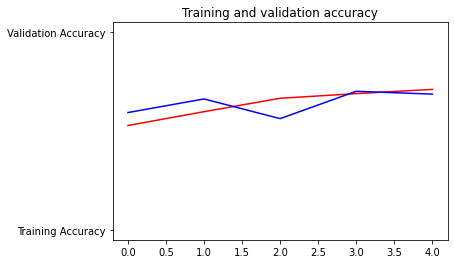

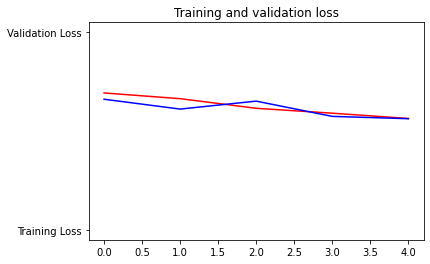

In [13]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, "r", "Training Accuracy", label="Training")
plt.plot(epochs, val_acc, "b", "Validation Accuracy", label="Validation")
plt.title("Training and validation accuracy")
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, "r", "Training Loss")
plt.plot(epochs, val_loss, "b", "Validation Loss")


plt.title("Training and validation loss")

# Desired output. Charts with training and validation metrics. No crash :)

In [14]:
import numpy as np

# from google.colab import files
from keras.preprocessing import image

# uploaded=files.upload()

# for fn in uploaded.keys():

# predicting images
#   path='/content/' + fn
path = "C:/Users/jadav/Desktop/Tensorflow notebooks/cat-dog-val/"
for fn in os.listdir(path):
    img = image.load_img(path + fn, target_size=(150, 150))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=32)
    print(float(classes))
    #     label = fn[:3]
    #     right_answers = []
    #     wrong_answers = []

    #     if classes[0] > 0 and label == 'dog':
    #         right_answers.append(fn)
    #         print("right")
    #     elif classes[0] < 0 and label == 'dog':
    #         wrong_answers.append(fn)
    #         print("wrong")

    #     if classes[0] < 0 and label == 'cat':
    #         right_answers.append(fn)
    #         print("right")
    #     elif classes[0] >0 and label == 'cat':
    #         wrong_answers.append(fn)
    #         print("wrong")
    # #     print(classes[0])

    if classes[0] > 0:
        print(fn + " is a dog")

    else:
        print(fn + " is a cat")
# print(len(right_answers),len(wrong_answers), right_answers, wrong_answers)

1.0
cat.2002.jpg is a dog
1.0
cat.2025.jpg is a dog
7.743759164217459e-36
cat.2030.jpg is a dog
1.21745516445948e-10
cat.2040.jpg is a dog
1.1527910922275422e-21
cat.2043.jpg is a dog
0.00011199430446140468
cat.2058.jpg is a dog
1.0
cat.2061.jpg is a dog
1.0
cat.2063.jpg is a dog
3.4781396275748114e-16
cat.2064.jpg is a dog
1.0
cat.2067.jpg is a dog
1.0
cat.2086.jpg is a dog
1.0
cat.2236.jpg is a dog
1.0
cat.2237.jpg is a dog
1.0
cat.2242.jpg is a dog
0.7537813186645508
cat.2246.jpg is a dog
0.9799615144729614
cat.2259.jpg is a dog
0.9995368719100952
cat.2433.jpg is a dog
1.0
cat.2434.jpg is a dog
1.0
cat.2435.jpg is a dog
0.9999775886535645
cat.2436.jpg is a dog
1.1305989744414546e-07
cat.2442.jpg is a dog
1.0
dog.2000 - Copy.jpg is a dog
1.0
dog.2002 - Copy.jpg is a dog
1.0
dog.2003 - Copy.jpg is a dog
1.0
dog.2004 - Copy.jpg is a dog
1.0
dog.2006 - Copy.jpg is a dog
1.0
dog.2019 - Copy.jpg is a dog
1.0
dog.2022 - Copy.jpg is a dog
7.034873118066942e-12
dog.2024 - Copy.jpg is a dog
1

<ipython-input-15-898ec89c91a9>:66: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


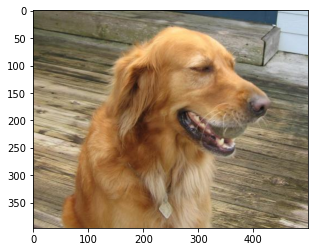

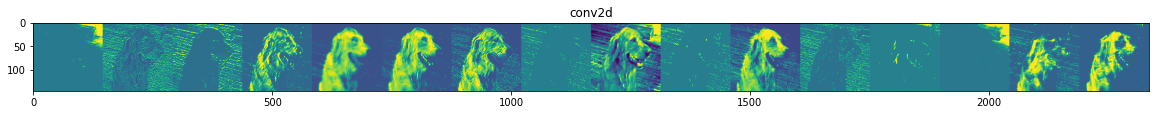

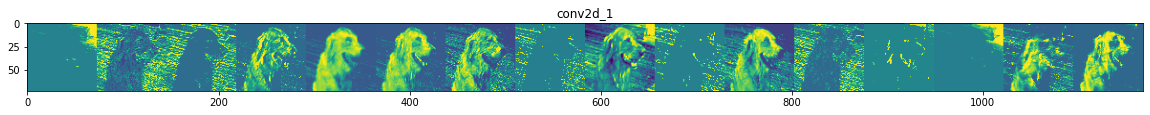

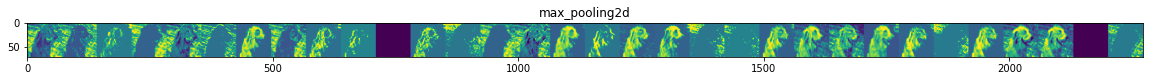

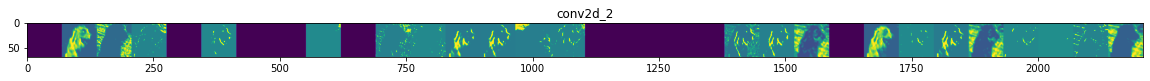

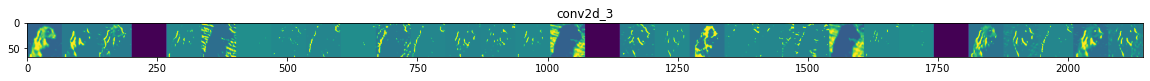

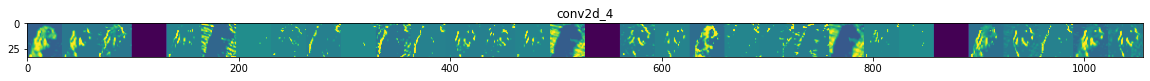

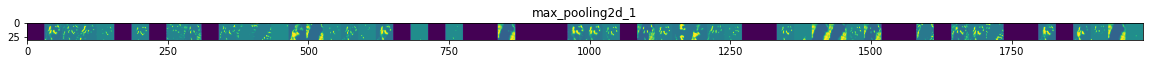

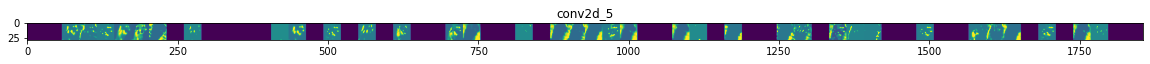

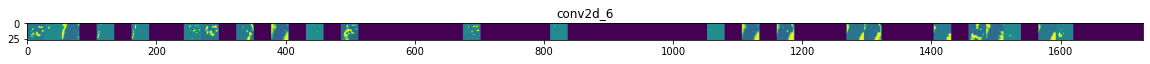

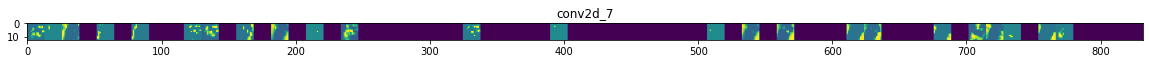

In [15]:
%matplotlib inline
import random

import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_cats_fnames = os.listdir(cat_train)
train_dogs_fnames = os.listdir(dog_train)
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(
    inputs=model.input, outputs=successive_outputs
)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(cat_train, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(dog_train, f) for f in train_dogs_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
im = Image.open(img_path)
imshow(np.asarray(im))

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        # -------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        # -------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        # -------------------------------------------------
        # Postprocess the feature to be visually palatable
        # -------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype("uint8")
            display_grid[
                :, i * size : (i + 1) * size
            ] = x  # Tile each filter into a horizontal grid

        # -----------------
        # Display the grid
        # -----------------

        scale = 20.0 / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect="auto", cmap="viridis")

In [16]:
%load_ext tensorboard
%tensorboard --logdir=logs --path_prefix /tensorboard

Reusing TensorBoard on port 6006 (pid 13100), started 0:16:05 ago. (Use '!kill 13100' to kill it.)